# 图生图示例：带珍珠耳环的小狗

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/150 [00:00<?, ?it/s]

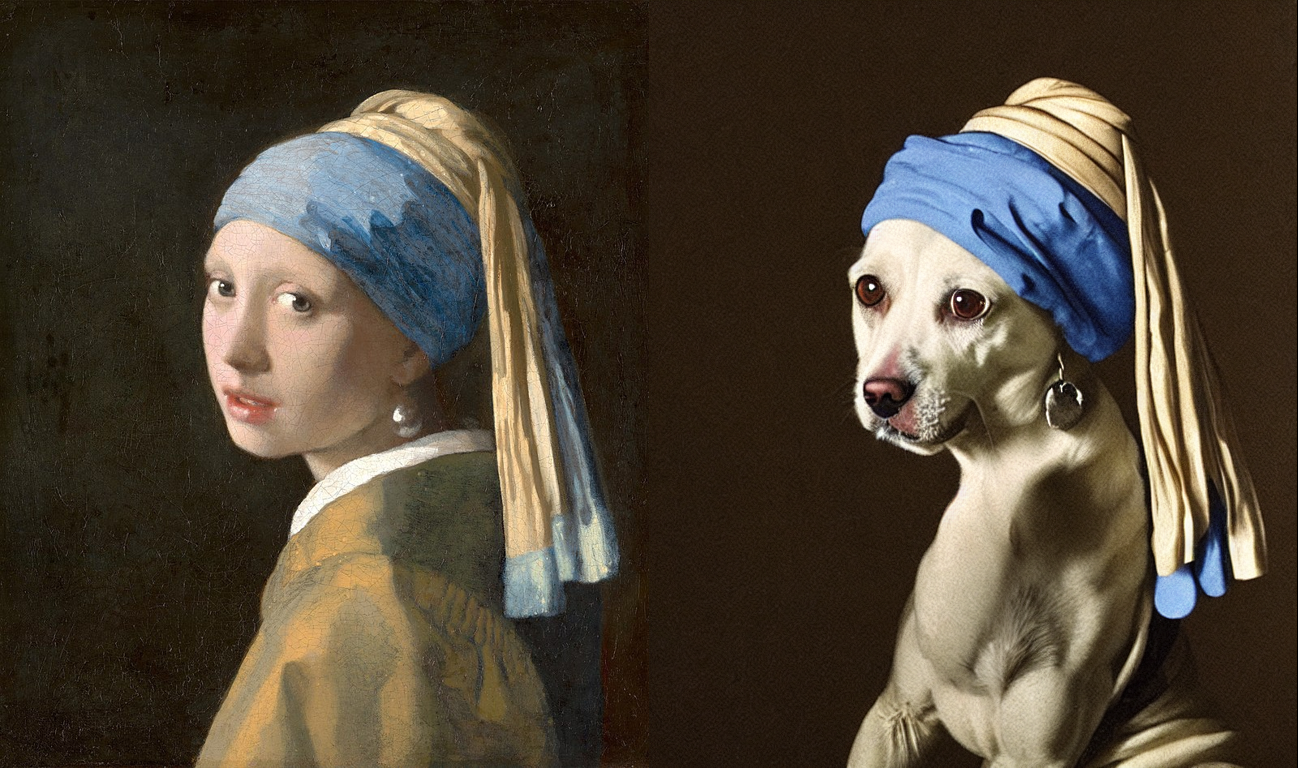

In [9]:
from diffusers import AutoPipelineForImage2Image
import torch

from diffusers.utils import load_image,make_image_grid

model_path="/models/stable-diffusion-v1-5"

pipeline = AutoPipelineForImage2Image.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()

prompt = "a portrait of a dog wearing a pearl earring"

url = "./800px-1665_Girl_with_a_Pearl_Earring.jpg"


image = load_image(url)
image.thumbnail((768, 768))

generator = torch.Generator(device="cuda").manual_seed(110)
new_image = pipeline(prompt, image, num_inference_steps=200, strength=0.75, guidance_scale=10.5,
                 generator=generator).images[0]
# image
make_image_grid([image, new_image], rows=1, cols=2)